In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pathlib
from matplotlib.lines import Line2D
from PIL import Image

%matplotlib inline

In [2]:
_METRICS_FILE = './files/benchmark'
_METRIC = 'accuracy'
_MODELS = ['keras_parallel_3_Dilated_Conv', 'keras_3_Dilated_Conv']

directory = './files/keras/'+_METRIC+'/'

In [3]:
try:
    #read csv file
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except OSError as err:
    # if there is no csv file we read the excel file
    excel_file = pd.read_excel(_METRICS_FILE+'.xlsx')
    # transform the excel file in a csv file
    excel_file.to_csv(_METRICS_FILE+'.csv', index=False)
    # read the new csv file 
    metrics = pd.read_csv(_METRICS_FILE+'.csv')
except:
    print("ERROR WHILE READING METRICS FILE")

metrics['total_time_s'] = metrics.apply(lambda row: row['train_time_s']+row['test_time_s'], axis=1)
metrics.sample(5)

,dataset,classifier,total,tp,tn,fp,fn,precision,recall,f1,fbeta,accuracy,train_time_s,test_time_s,total_time_s
568,Earthquakes,MOA_SGD,461.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.795324,0.001427,0.000290,0.001717
85,Beef,sklearn_Perceptron,50.0,0.000000,0.200000,0.000000,0.000000,0.352778,0.320000,0.263069,0.263069,0.320000,0.006411,0.001390,0.007801
1301,MiddlePhalanxTW,sklearn_PassiveAggressiveClassifier,543.0,0.000000,1.036364,0.000000,0.000000,0.395920,0.494545,0.419524,0.419524,0.494545,0.029696,0.003695,0.033391
2255,Wafer,keras_parallel_3_Dilated_Conv,7154.0,0.928771,8.905028,0.027933,0.129888,0.600442,0.595088,0.980016,0.594852,0.984125,0.984698,6.755127,7.739825
2615,ozone,MOA_NaiveBayes,2534.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.721039,0.002582,0.016791,0.019373


In [4]:
metrics_total = metrics[metrics.classifier.isin(_MODELS) ][['classifier','total',_METRIC]]
metrics_total_keras = metrics_total.sort_values(by=['total'])
metrics_total_keras = metrics_total_keras[metrics_total_keras['classifier']=='keras_3_Dilated_Conv']
#metrics_total_keras = metrics_total_keras.pivot(columns='classifier', values = ['total', _METRIC])
metrics_total_keras.head(20)    
metrics_total_keras_p = metrics_total.sort_values(by=['total'])
metrics_total_keras_p = metrics_total_keras_p[metrics_total_keras_p['classifier']=='keras_parallel_3_Dilated_Conv']
#metrics_total_keras_p = metrics_total_keras_p.pivot(columns='classifier', values = ['total', _METRIC])
metrics_total_keras_p.head(20)


,classifier,total,accuracy
139,keras_parallel_3_Dilated_Conv,30.0,0.466667
110,keras_parallel_3_Dilated_Conv,30.0,0.466667
284,keras_parallel_3_Dilated_Conv,46.0,0.483333
1443,keras_parallel_3_Dilated_Conv,50.0,0.260000
81,keras_parallel_3_Dilated_Conv,50.0,0.280000
2284,keras_parallel_3_Dilated_Conv,101.0,0.500000
660,keras_parallel_3_Dilated_Conv,102.0,0.366667
197,keras_parallel_3_Dilated_Conv,110.0,0.436364
1182,keras_parallel_3_Dilated_Conv,110.0,0.327273
1095,keras_parallel_3_Dilated_Conv,111.0,0.400000


<Figure size 432x288 with 0 Axes>

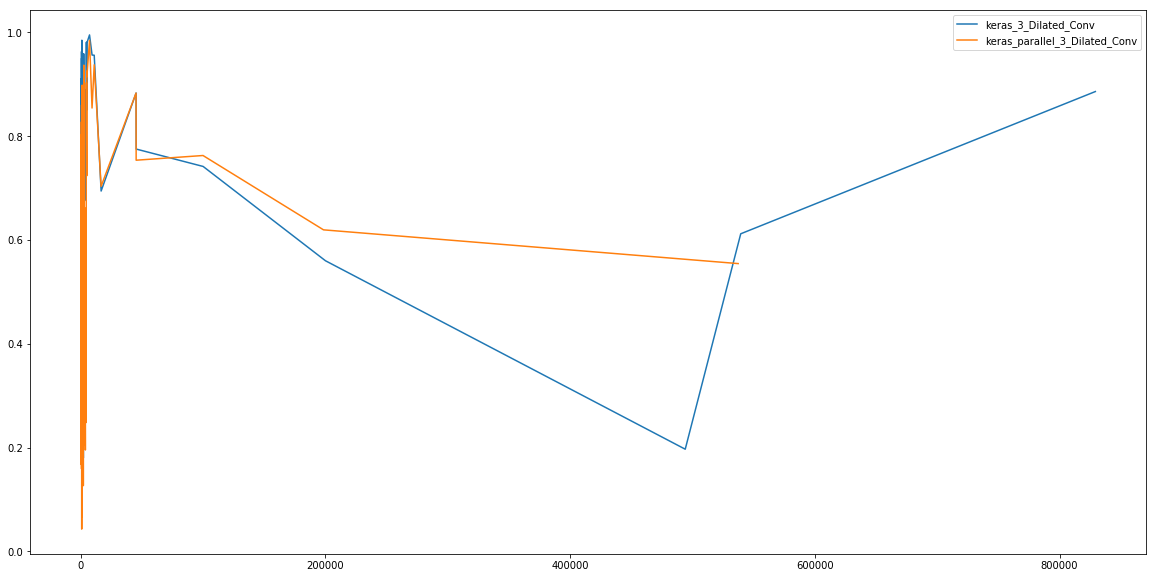

In [5]:
fig = plt.figure()
plt.figure(figsize=(20,10))
plt.plot(metrics_total_keras['total'], metrics_total_keras[_METRIC], label='keras_3_Dilated_Conv')
plt.plot(metrics_total_keras_p['total'], metrics_total_keras_p[_METRIC], label='keras_parallel_3_Dilated_Conv')
plt.legend(loc='best')

plt.show()